# Packages and OS

In [83]:
%load_ext autoreload
%autoreload 2

# generic packages
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm.auto import tqdm
from datetime import datetime
import pandas as pd
import seaborn as sns
import copy


# # os directory
YOUR_FOLDER_DIRECTORY = os.getcwd()

# Assuming 'src' directory is located one level above the notebook directory
project_directory = os.path.join(YOUR_FOLDER_DIRECTORY, '..')
sys.path.append(project_directory)

# src code
from src.portfolio_class_240309 import Portfolio
from src.config import (
    TICKERS,
    START_DATE,
    END_DATE,
    INTERVAL,
    RISK_FREE_RATE,
    MSCI_SCORE_ALREADY_DOWNLOADED,
    FREQUENCY_RETURNS
)
from src.backtesting_score import (
    get_last_esg_scores,
    get_first_date_with_all_msci_score_available,
    retrieve_last_esg_date
)

from src.controverse_score import (
    get_new_esg_score_min_method,
    get_new_esg_score_proba_method,
    boostrap_method_effect,
    compute_mean_over_controverse,
    compute_new_esg_score_with_method,
    change_msci_score_with_controverse
)
# scraper code
from exploration.scrapper.scraper import (
    download_msci_esg_ratings_htmlfile,
    load_dict_from_json
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Download MSCI data

In [2]:
if MSCI_SCORE_ALREADY_DOWNLOADED:
    # load data
    msci_score = load_dict_from_json("../data/exemple_msci_esg_ratings_numeric.json")
else:
    # scrap data
    msci_score={}
    for ticker in tqdm(TICKERS):
        dict = download_msci_esg_ratings_htmlfile(tickers=[ticker])
        msci_score[ticker] = dict[ticker]

    for ticker in msci_score.keys():
        for key, rating in msci_score[ticker]['esg_score_dict'].items():
            key = datetime.strptime(key, '%b-%y').strftime('%Y-%m-%d')
    # # save data
    # from src.config import save_dict_to_json
    # save_dict_to_json(msci_score, "../data/exemple_msci_esg_ratings_numeric.json")
    # MSCI_SCORE_ALREADY_DOWNLOADED=True


# Method min

In [84]:
get_new_esg_score_min_method(esg_score=30, controverse_score=2.5)

30.0

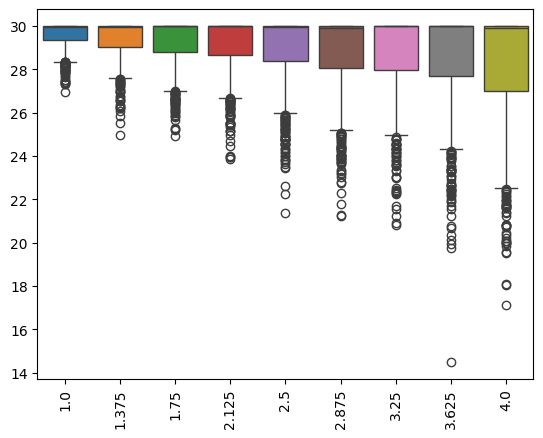

In [85]:
boostrap_method_effect(esg_score=30, method_function = get_new_esg_score_min_method, nb_boostrap=1000)

# Method probabilistic

In [86]:
get_new_esg_score_proba_method(esg_score=30, controverse_score=2.5)

30

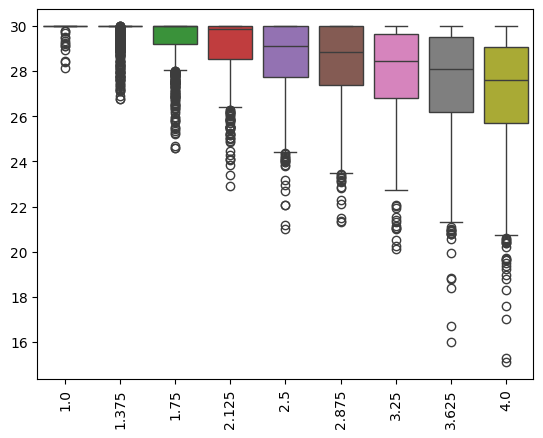

In [87]:
boostrap_method_effect(esg_score=30, method_function = get_new_esg_score_proba_method, nb_boostrap=1000)

# Computation on dataset

In [88]:
END_DATE = '2022-12-01'

dict_color_to_variance = {
    'Red': 4,
    'Orange':3,
    'Yellow':2,
    'Green':1
}

In [89]:
compute_new_esg_score_with_method(msci_score=msci_score, 
                                  end_date=END_DATE, 
                                  dict_color_to_variance=dict_color_to_variance, 
                                  method=get_new_esg_score_min_method)


,ticker,esg_score,controverse_score,esg_score_new
0,AMZN,50,2.333333,50.000000
1,TSLA,64,2.000000,64.000000
2,WMT,50,2.333333,50.000000
3,DIS,64,2.000000,64.000000
4,F,7,1.000000,7.000000
5,PG,36,2.666667,34.425784
6,COST,64,1.333333,64.000000
7,KO,48,2.333333,47.704216
8,PEP,79,2.000000,76.329346
9,XOM,50,2.666667,50.000000


In [91]:
compute_new_esg_score_with_method(msci_score=msci_score, 
                                  end_date=END_DATE, 
                                  dict_color_to_variance=dict_color_to_variance,
                                  method=get_new_esg_score_proba_method)

,ticker,esg_score,controverse_score,esg_score_new
0,AMZN,50,2.333333,49.023783
1,TSLA,64,2.000000,60.979239
2,WMT,50,2.333333,46.901926
3,DIS,64,2.000000,64.000000
4,F,7,1.000000,7.000000
5,PG,36,2.666667,36.000000
6,COST,64,1.333333,64.000000
7,KO,48,2.333333,47.796981
8,PEP,79,2.000000,79.000000
9,XOM,50,2.666667,48.103875


Pour aller plus loin peut être faire une méthode probabilistique sur chacun des scores E, S et G

In [94]:
msci_score_with_controverse = change_msci_score_with_controverse(msci_score=msci_score, 
                                                        end_date=END_DATE, 
                                                        dict_color_to_variance=dict_color_to_variance,  
                                                        method=get_new_esg_score_min_method)
msci_score_with_controverse

{'AMZN': {'esg_score_dict': {'2020-04-01': 50,
   '2020-12-01': 50,
   '2021-12-01': 49.8072349904984,
   '2022-12-01': 64,
   '2023-08-01': 50},
  'industry_scores_dict': {'CCC': 0.01,
   'B': 0.03,
   'BB': 0.07,
   'BBB': 0.13,
   'A': 0.32,
   'AA': 0.36,
   'AAA': 0.07},
  'industry': 'retail - consumer discretionary industry',
  'controversy_info': {'Environment': 'Yellow',
   'Social': 'Orange',
   'Governance': 'Yellow'}},
 'TSLA': {'esg_score_dict': {'2020-04-01': 64,
   '2021-05-01': 64,
   '2021-12-01': 64,
   '2022-05-01': 63.773384349867726,
   '2023-07-01': 64},
  'industry_scores_dict': {'CCC': 0.04,
   'B': 0.2,
   'BB': 0.14,
   'BBB': 0.12,
   'A': 0.31,
   'AA': 0.12,
   'AAA': 0.08},
  'industry': 'automobiles industry',
  'controversy_info': {'Environment': 'Green',
   'Social': 'Orange',
   'Governance': 'Yellow'}},
 'WMT': {'esg_score_dict': {'2020-06-01': 50,
   '2020-12-01': 36,
   '2021-09-01': 50,
   '2022-10-01': 50.0,
   '2023-12-01': 50},
  'industry_score

# 1. Get optimal weights under constraints

In [93]:
END_DATE = '2022-12-01'

if datetime.strptime(END_DATE, '%Y-%m-%d') < get_first_date_with_all_msci_score_available(msci_score):
    print("ERROR: END_DATE is before the first date with all msci score available.")
    END_DATE = get_first_date_with_all_msci_score_available(msci_score)
    print(f"END_DATE is now {END_DATE}, but you can change it.")
else:
    print("Thanks for having entered a valid end date !")

Thanks for having entered a valid end date !


In [97]:
msci_last_esg_score = get_last_esg_scores(msci_score, END_DATE)

PORTFOLIO = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      msci_last_esg_score,
                      FREQUENCY_RETURNS)

PORTFOLIO.download_data()

msci_last_esg_score_with_controverse = get_last_esg_scores(msci_score_with_controverse, END_DATE)

PORTFOLIO_WITH_CONTROVERSE = Portfolio(TICKERS,
                      START_DATE,
                      END_DATE,
                      INTERVAL,
                      msci_last_esg_score_with_controverse,
                      FREQUENCY_RETURNS)

PORTFOLIO_WITH_CONTROVERSE.download_data()


[************          26%%                      ]  8 of 31 completed

[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed


In [98]:
MAX_ESG_SCORE = 60
MAX_ESG_SCORES = list(np.linspace(np.min(msci_last_esg_score), np.max(msci_last_esg_score), 30))
GAMMA_VALUES = np.linspace(-5, 5, 100)  # Inverse of the risk aversion parameter


## 1.1. Market optimum

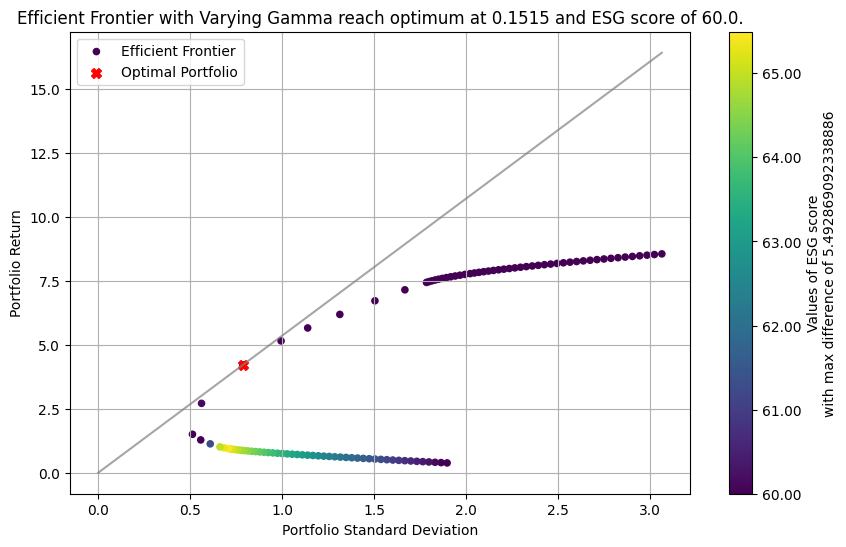

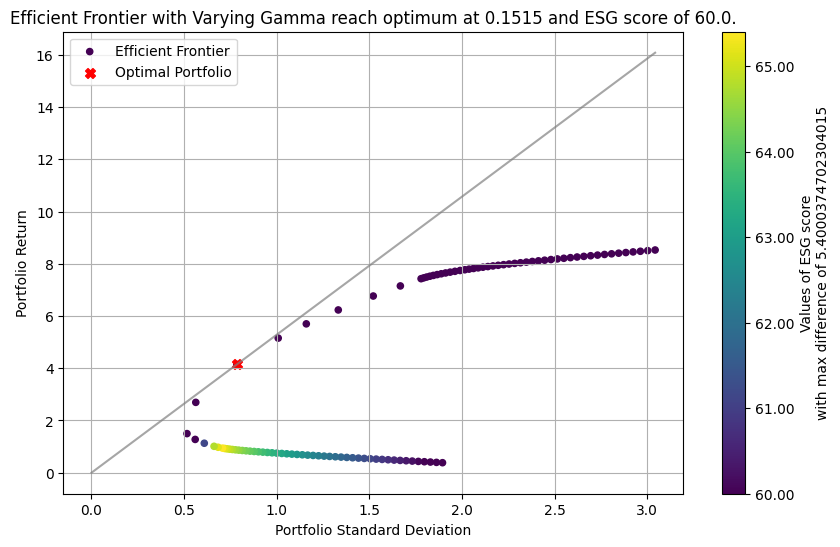

In [100]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

PORTFOLIO_WITH_CONTROVERSE.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)


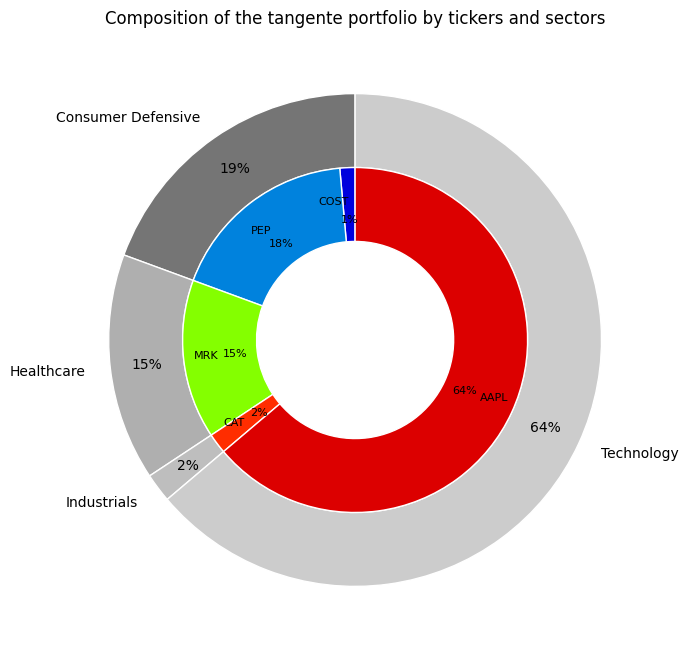

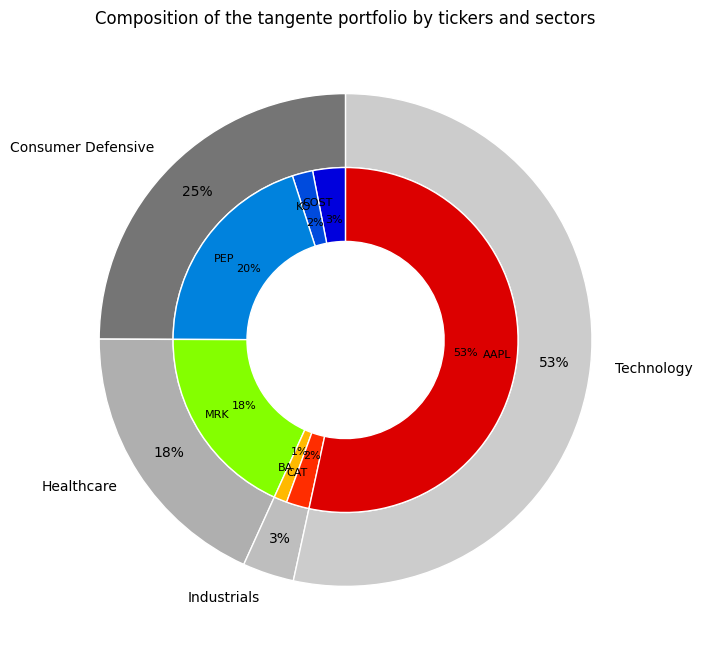

In [101]:
PORTFOLIO.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True)

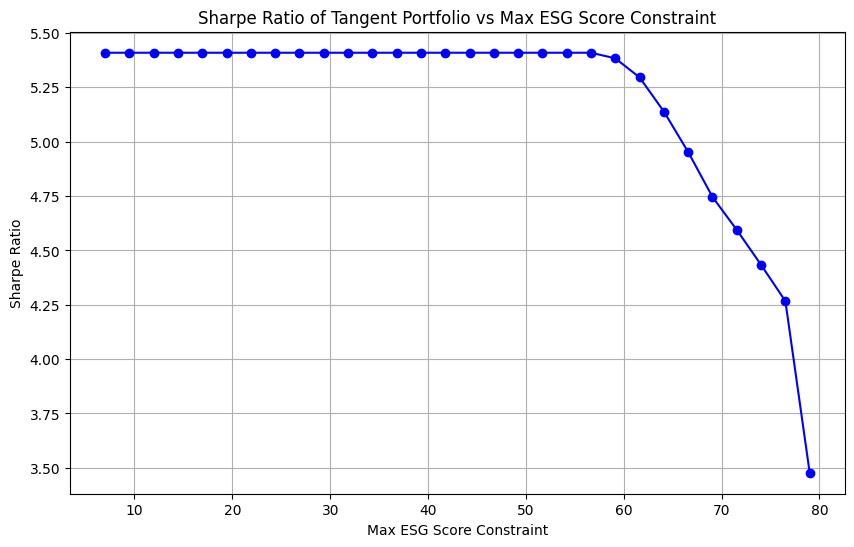

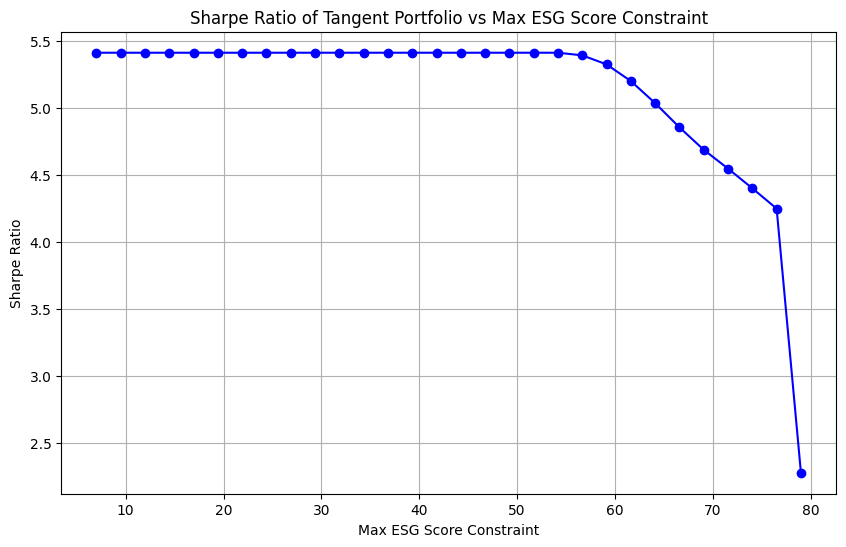

In [102]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global')


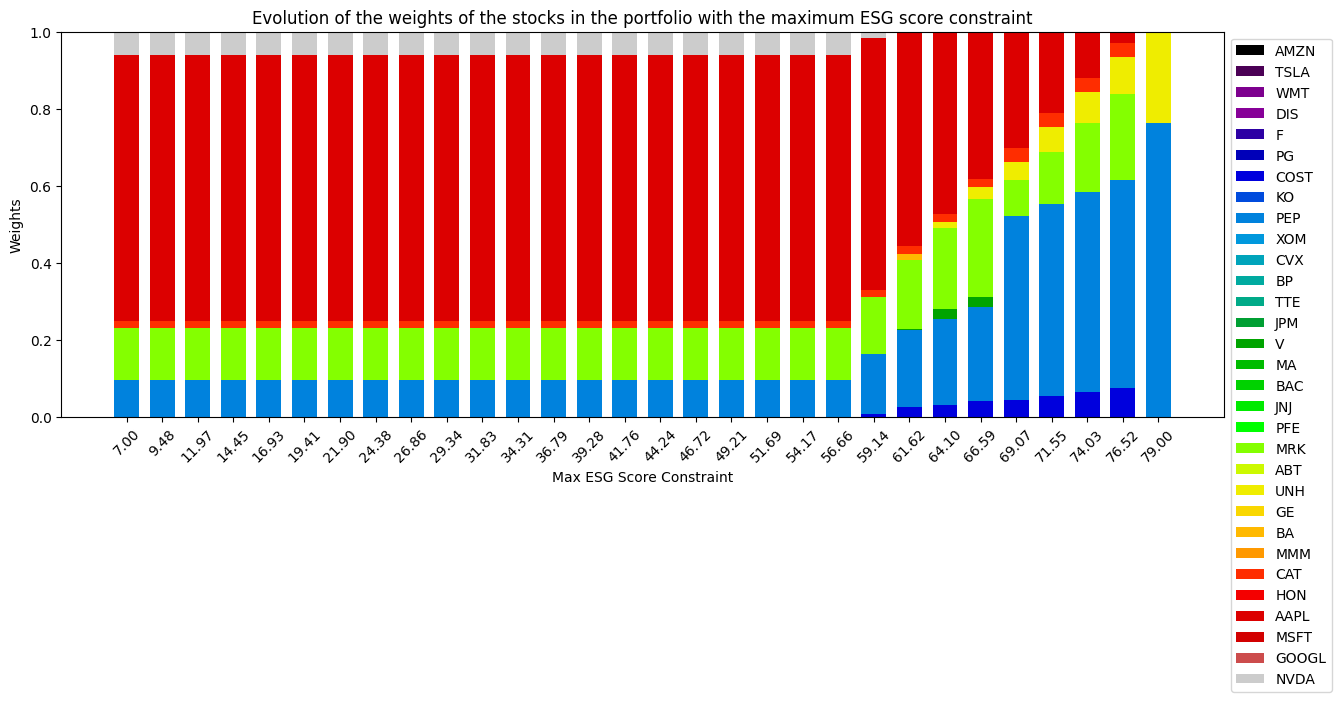

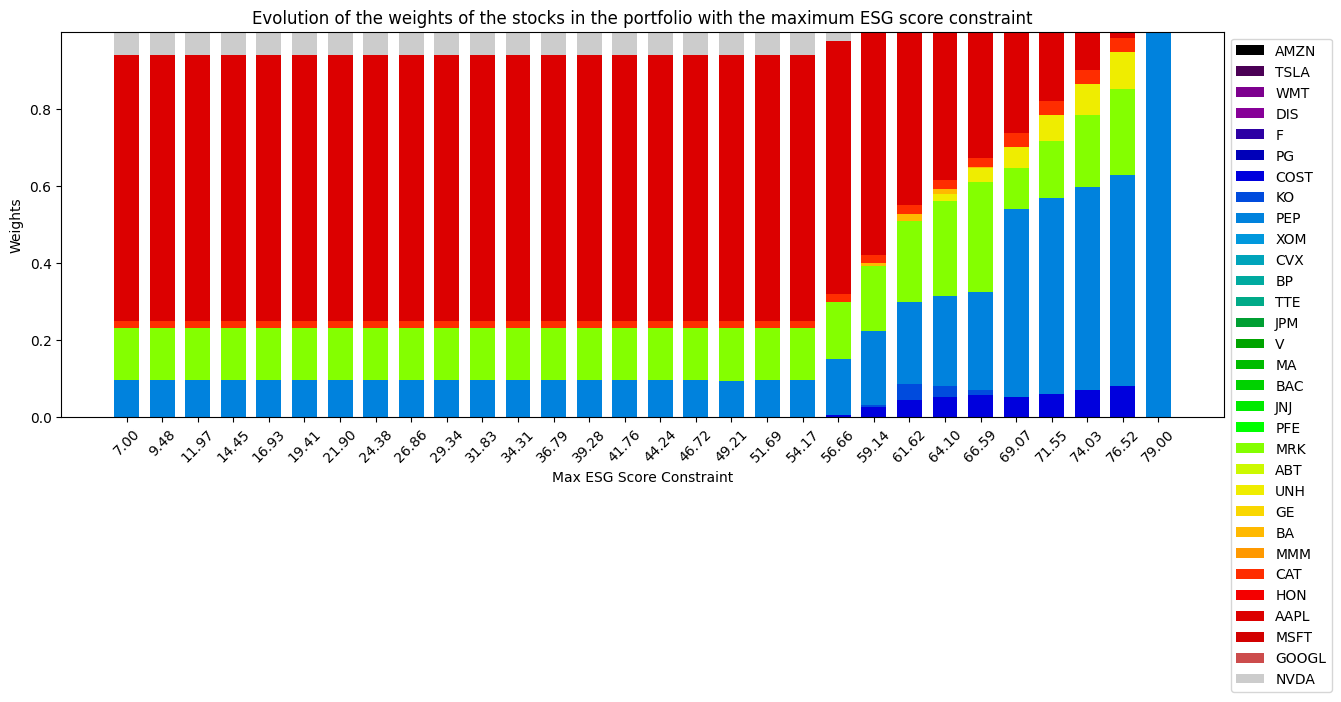

In [103]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global')

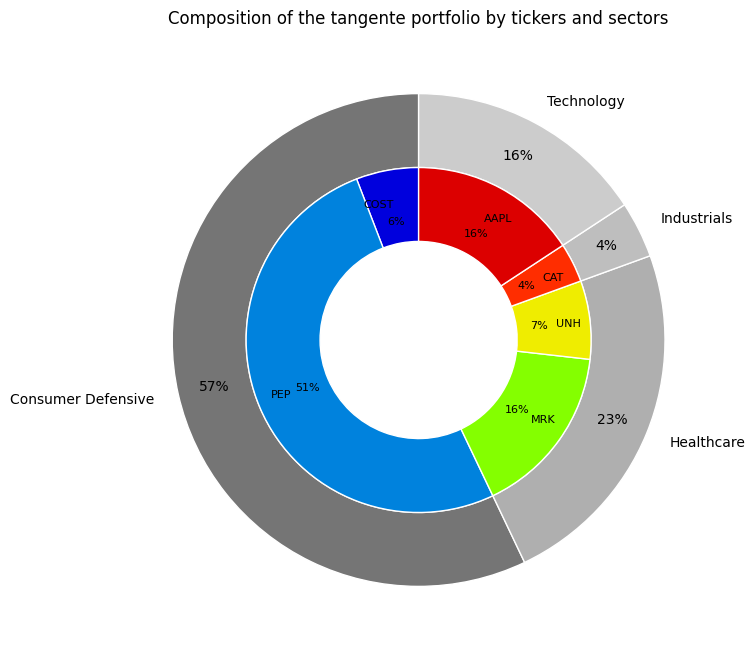

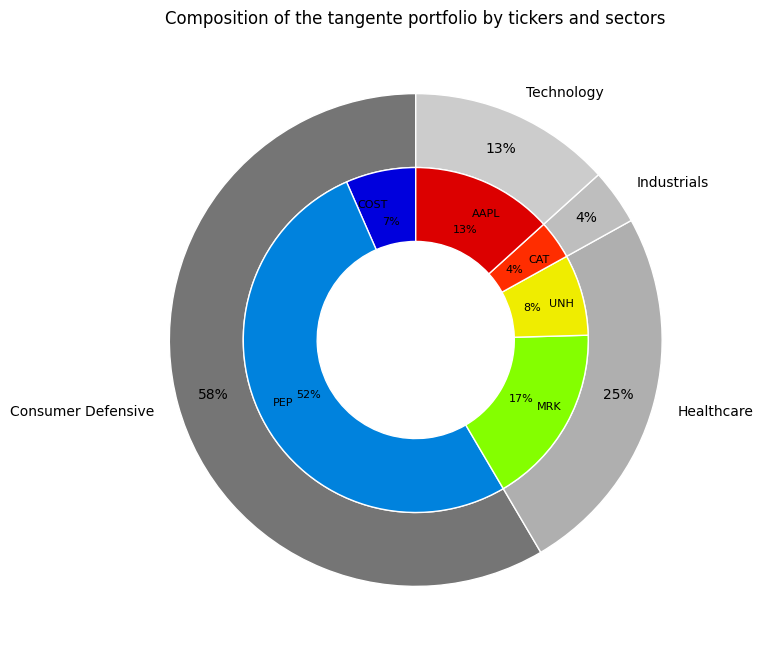

In [104]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global')

## 1.2. Selection 50% best global scale

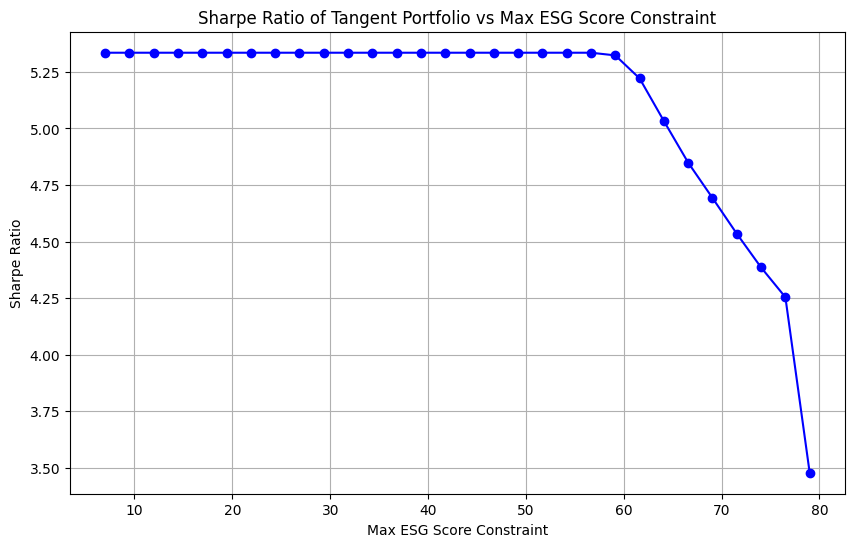

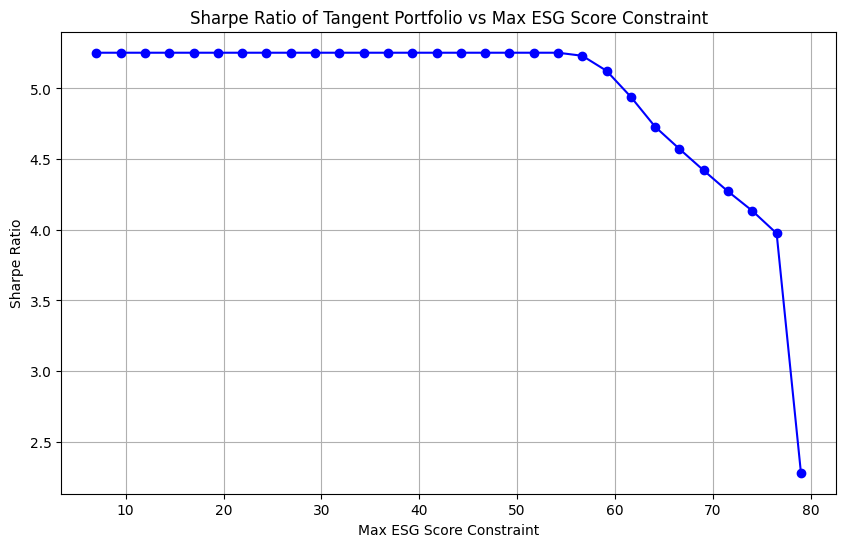

In [105]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='global')
                                        
PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='global')


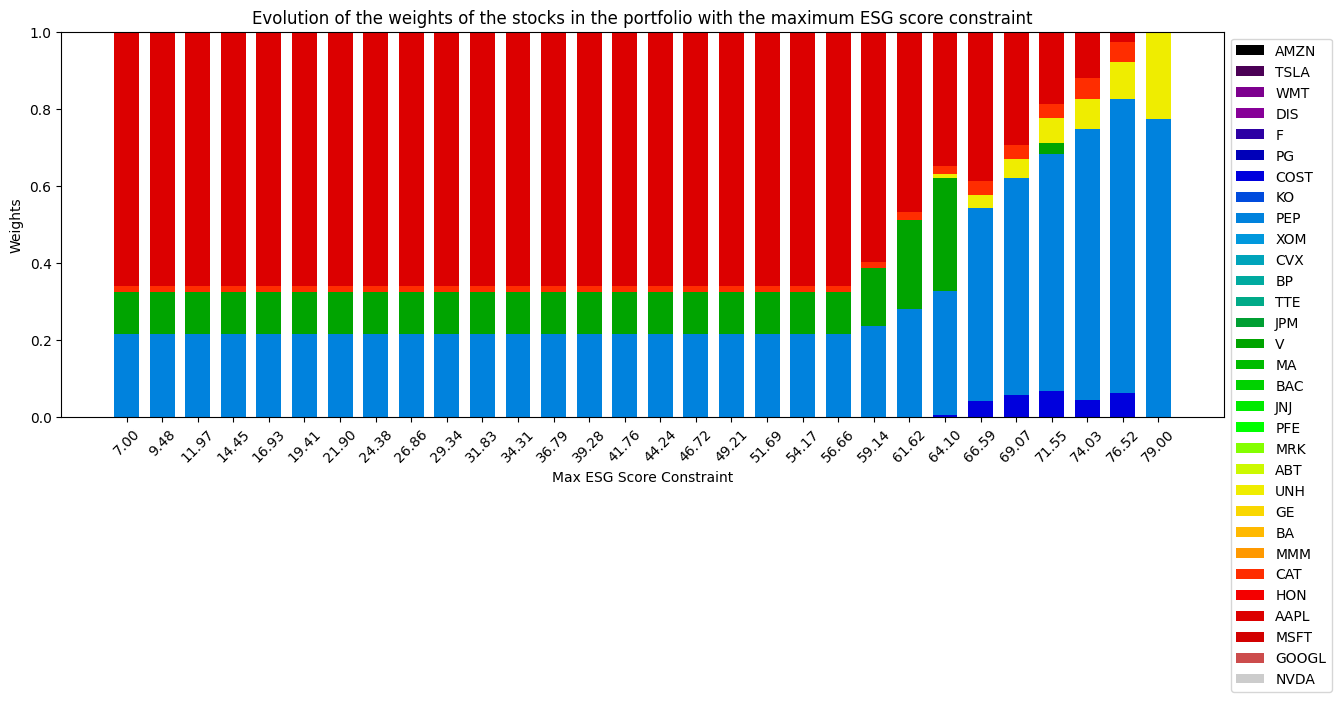

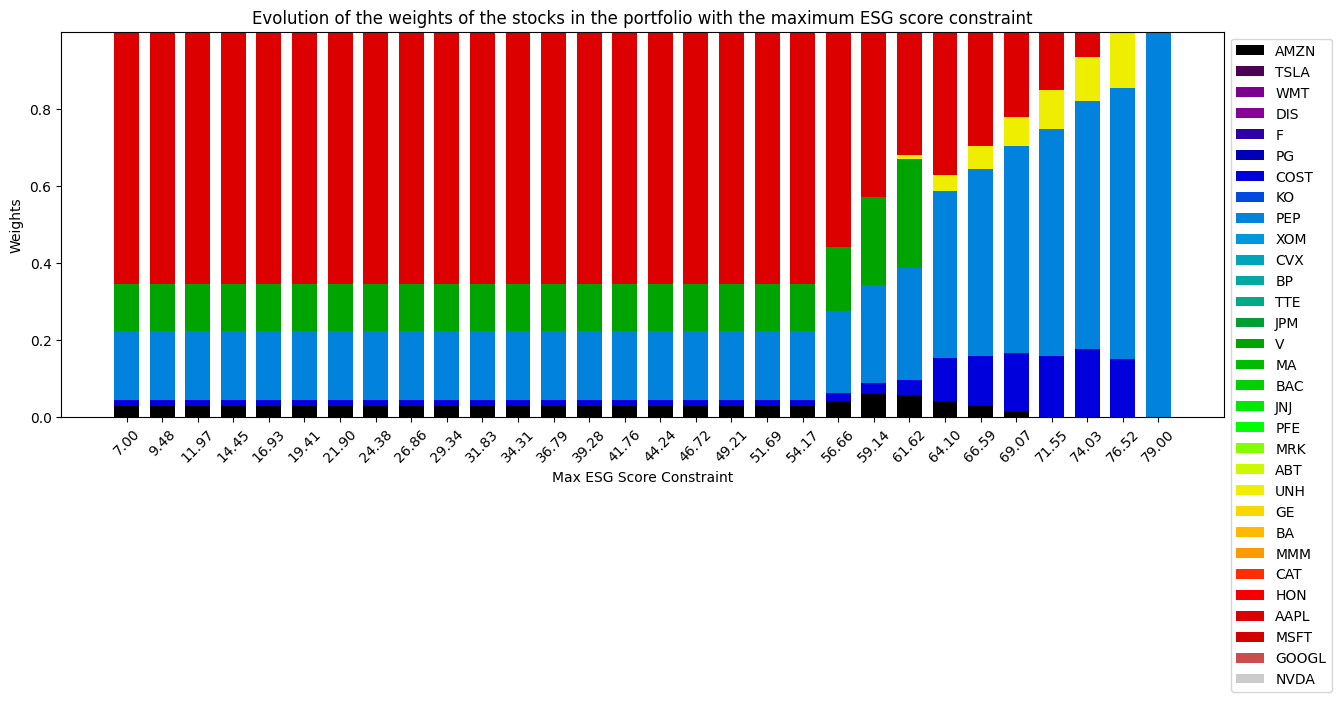

In [106]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='global')

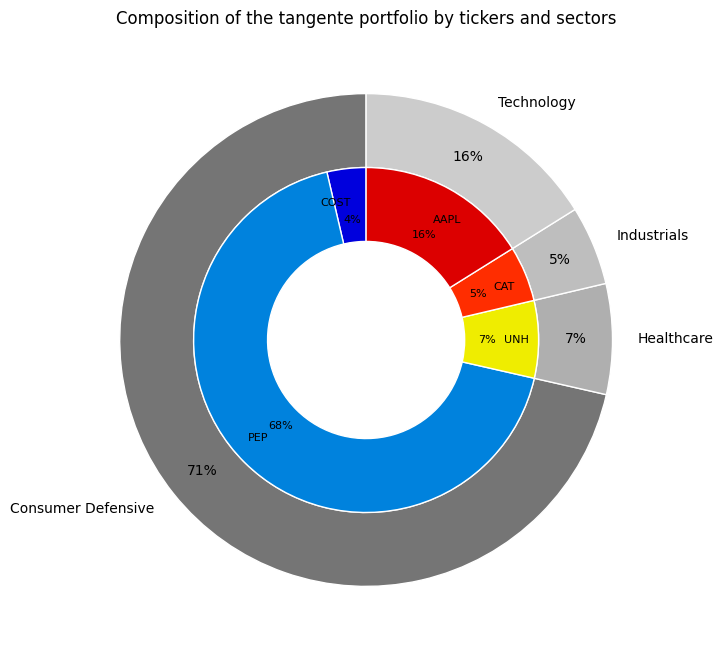

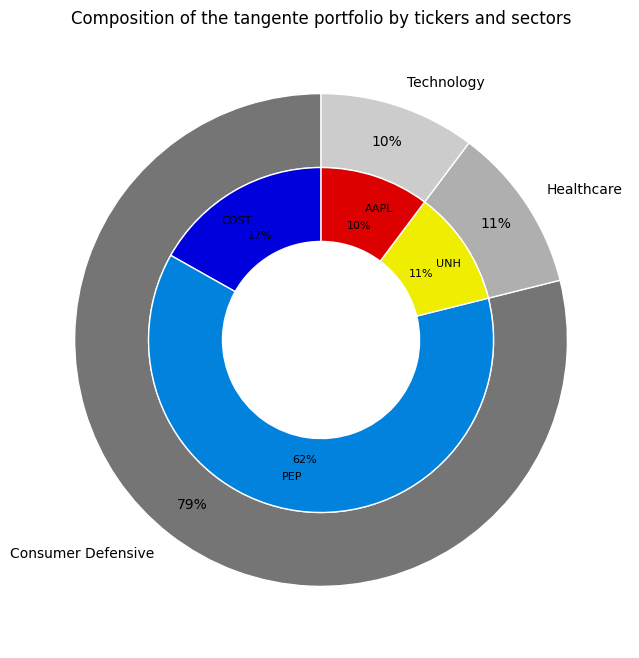

In [107]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='global')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='global')


## 1.3. Selection 50% best sector scale

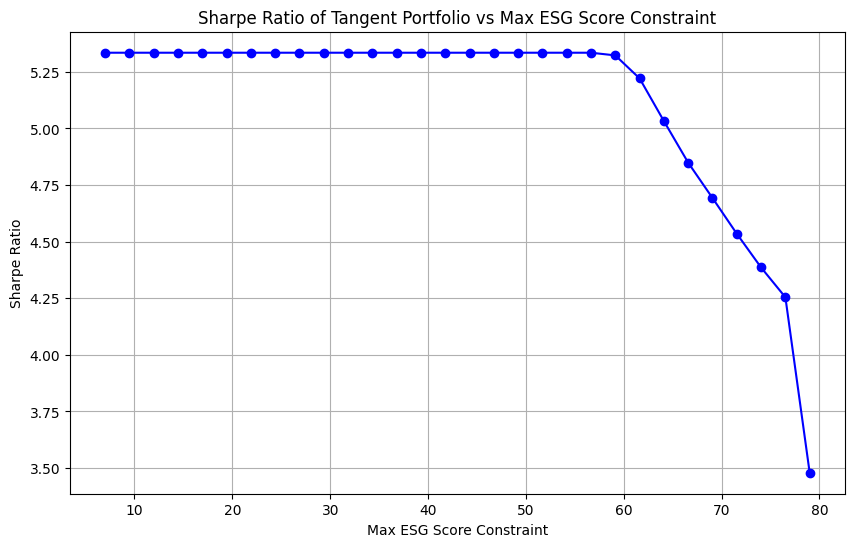

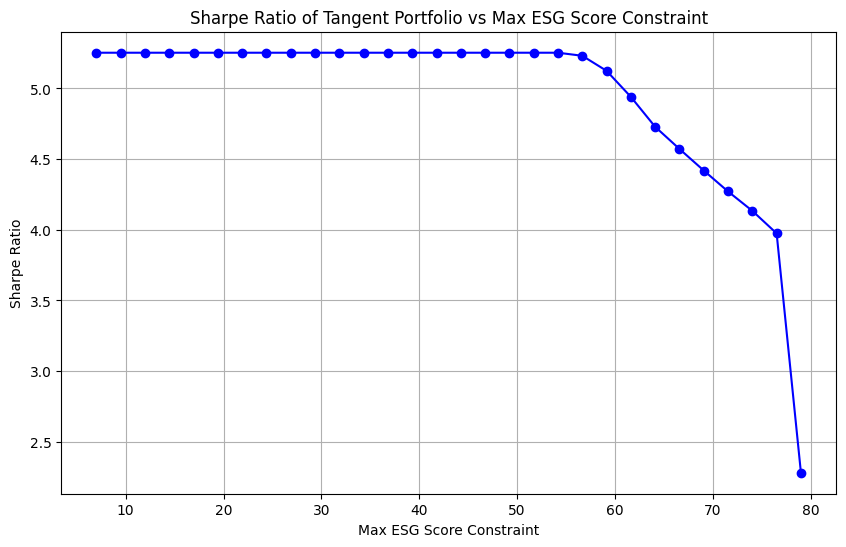

In [108]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector')


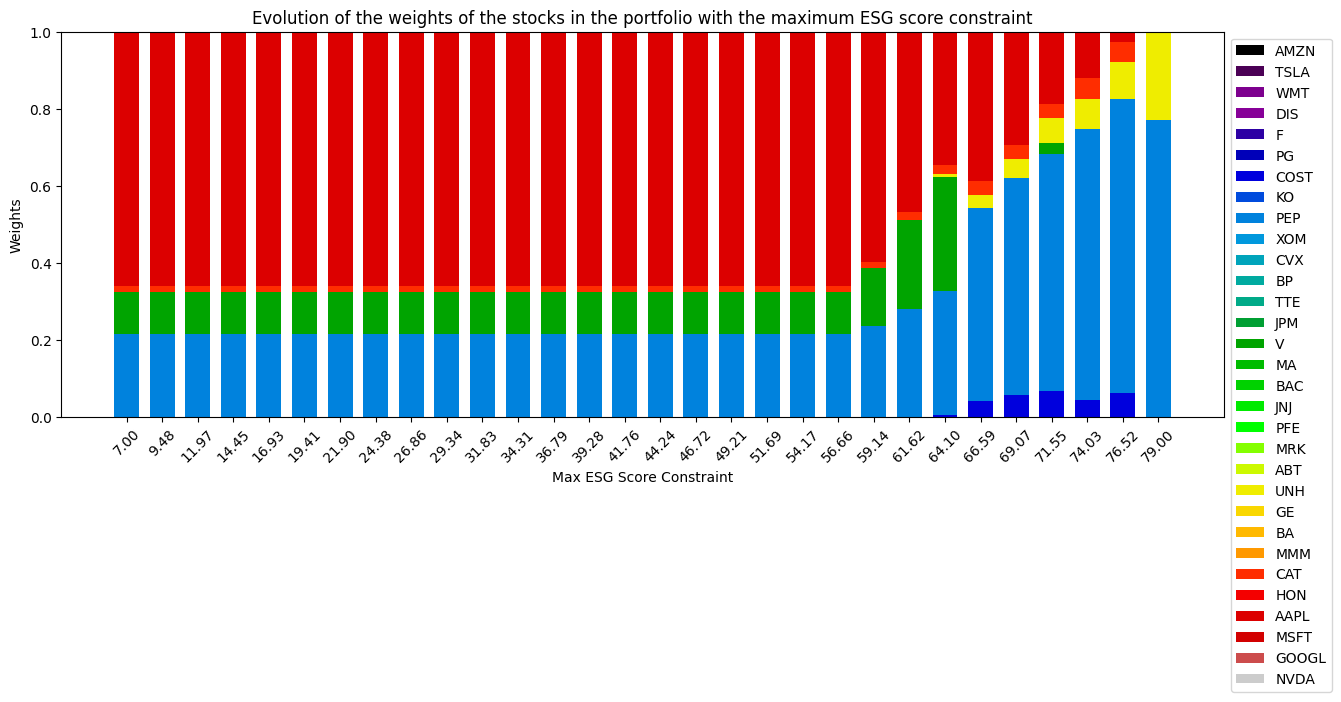

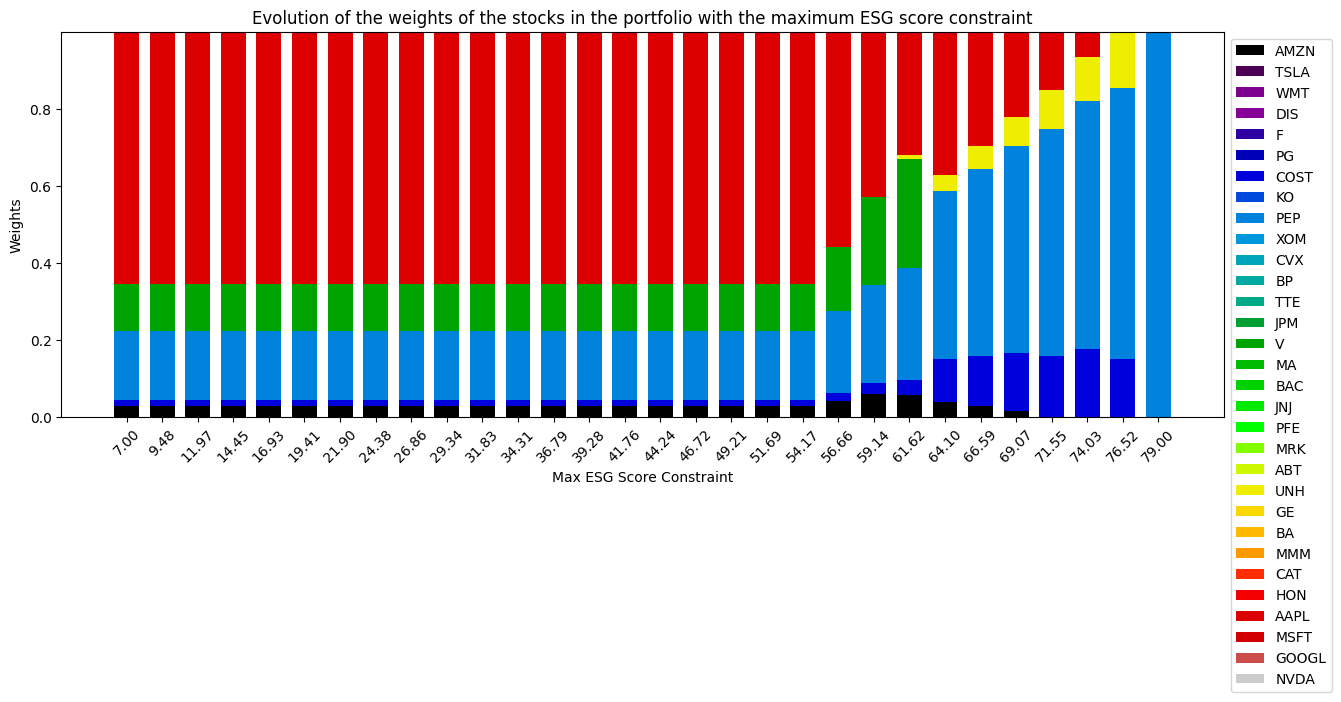

In [109]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector')


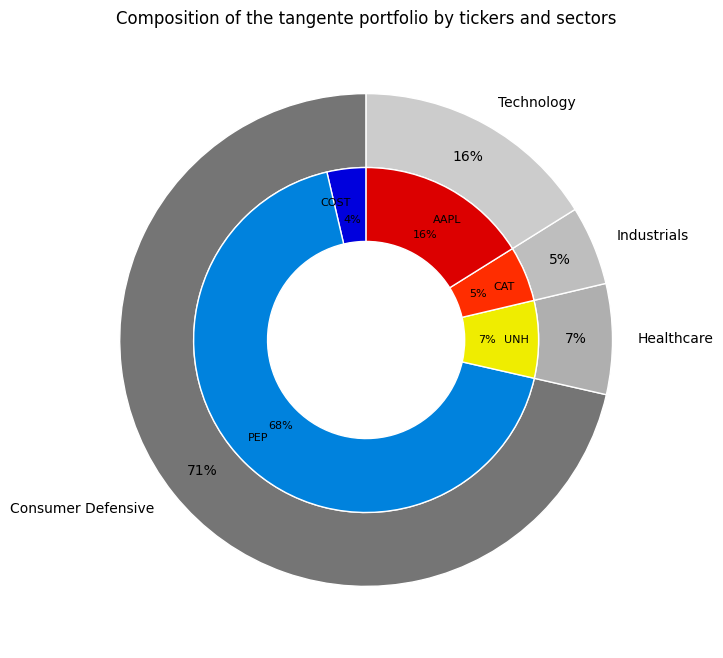

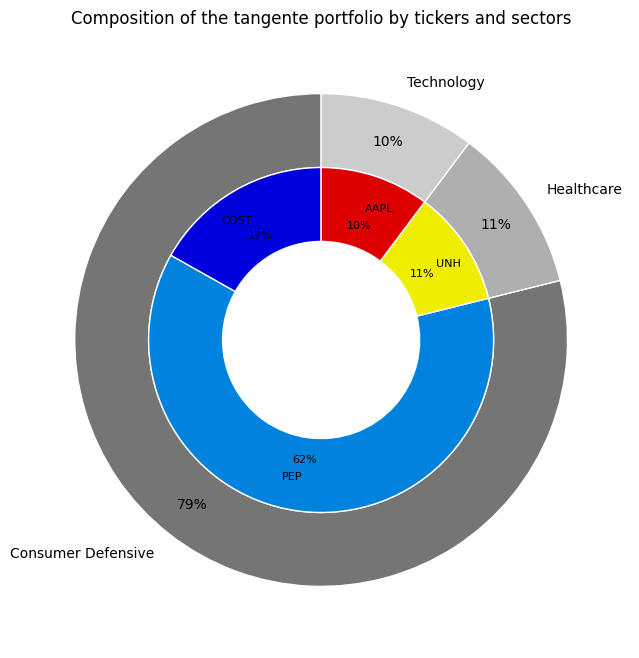

In [110]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector')

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector')


## 1.4. Fixing lower bound on investment per sector

In [111]:
# Ne devrait pas marcher 
# SECTOR_MIN_WEIGHT_X_DICT_EQUAL_WEIGHTED = {sector_name: len(set(PORTFOLIO.get_sector_for_tickers().values())) 
#                                            for sector_name in set(PORTFOLIO.get_sector_for_tickers().values())}

SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS = {'Communication Services': 0.1,
                                      'Consumer Cyclical': 0,
                                      'Consumer Defensive': 0,
                                      'Energy': 0.3,
                                      'Financial Services': 0,
                                      'Healthcare': 0,
                                      'Industrials': 0,
                                      'Technology': 0}



### 1.4.1. Lower bound - Market optimum

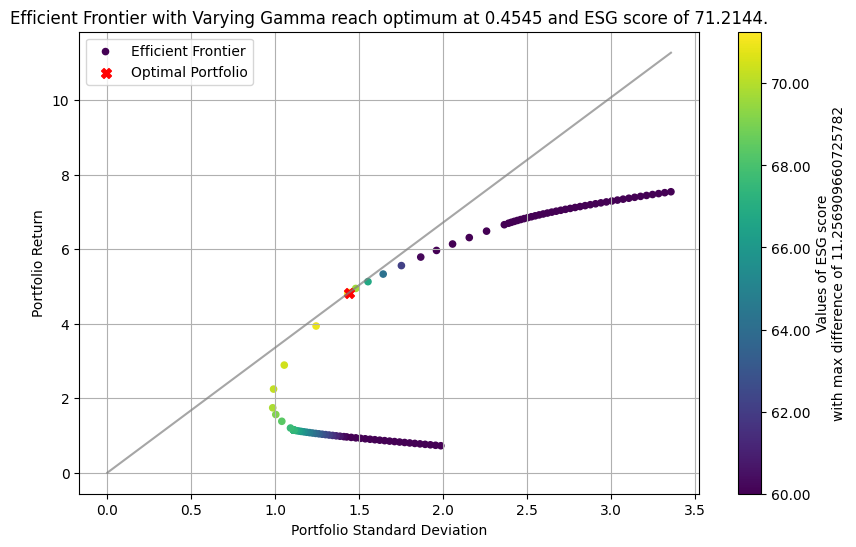

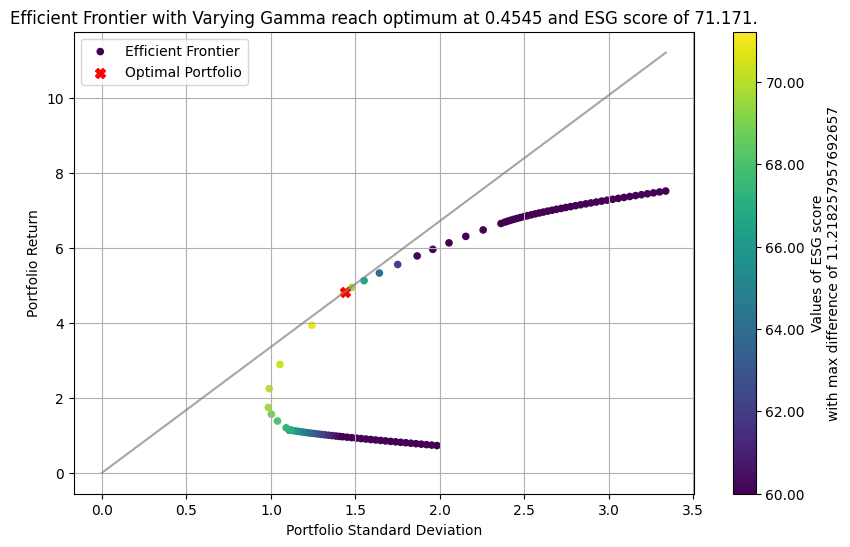

In [112]:
PORTFOLIO.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_efficient_frontier(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

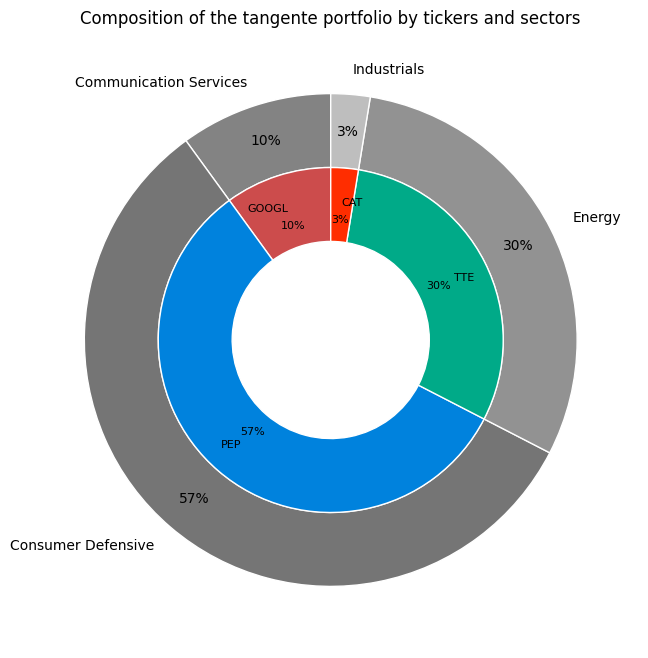

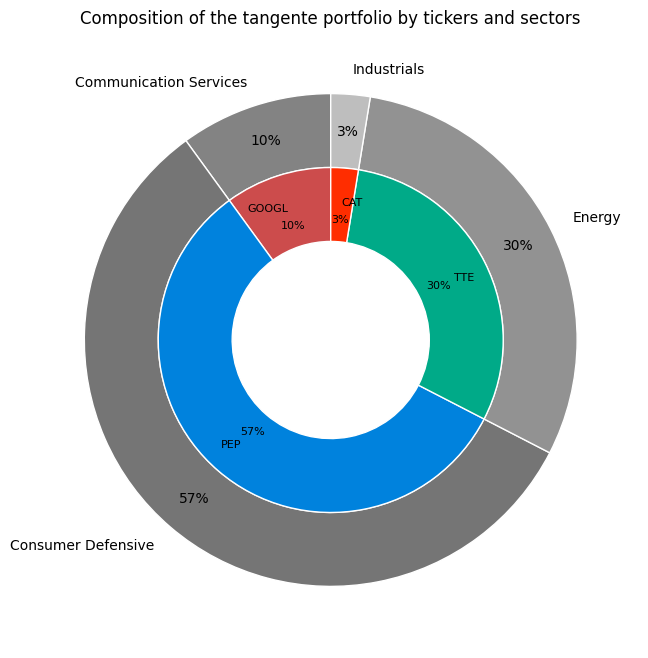

In [113]:
PORTFOLIO.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(GAMMA_VALUES, 
                                  risk_free_rate=RISK_FREE_RATE,
                                  max_esg_score=MAX_ESG_SCORE,
                                  fully_invested=True,
                                  long_only=True,
                                  sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

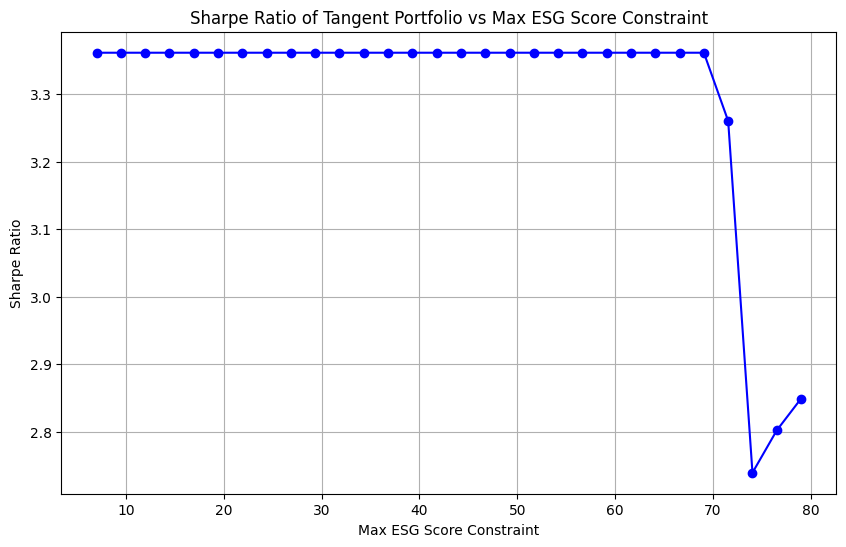

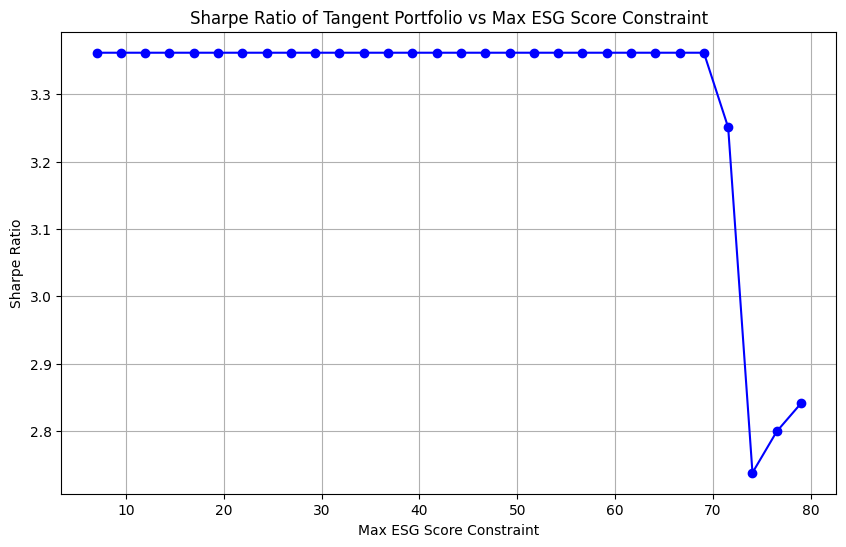

In [114]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=1,
                                        best_in_class_strategy='global',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


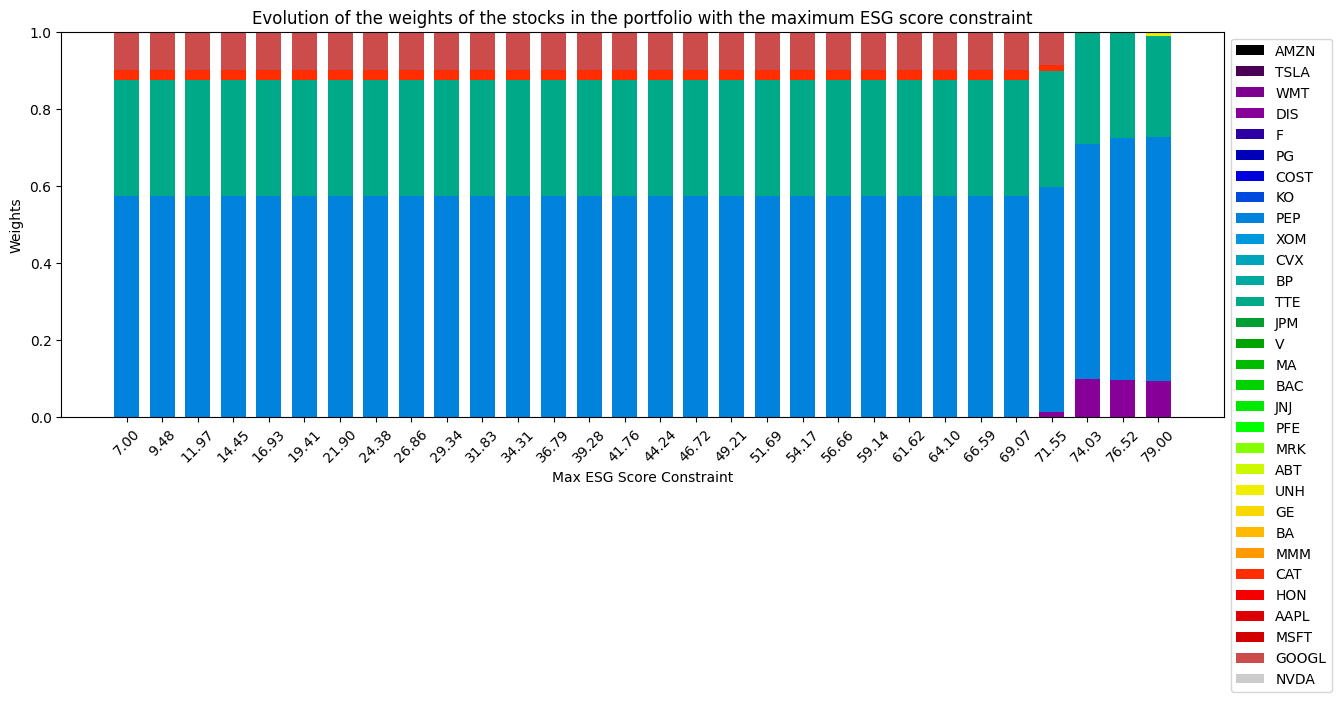

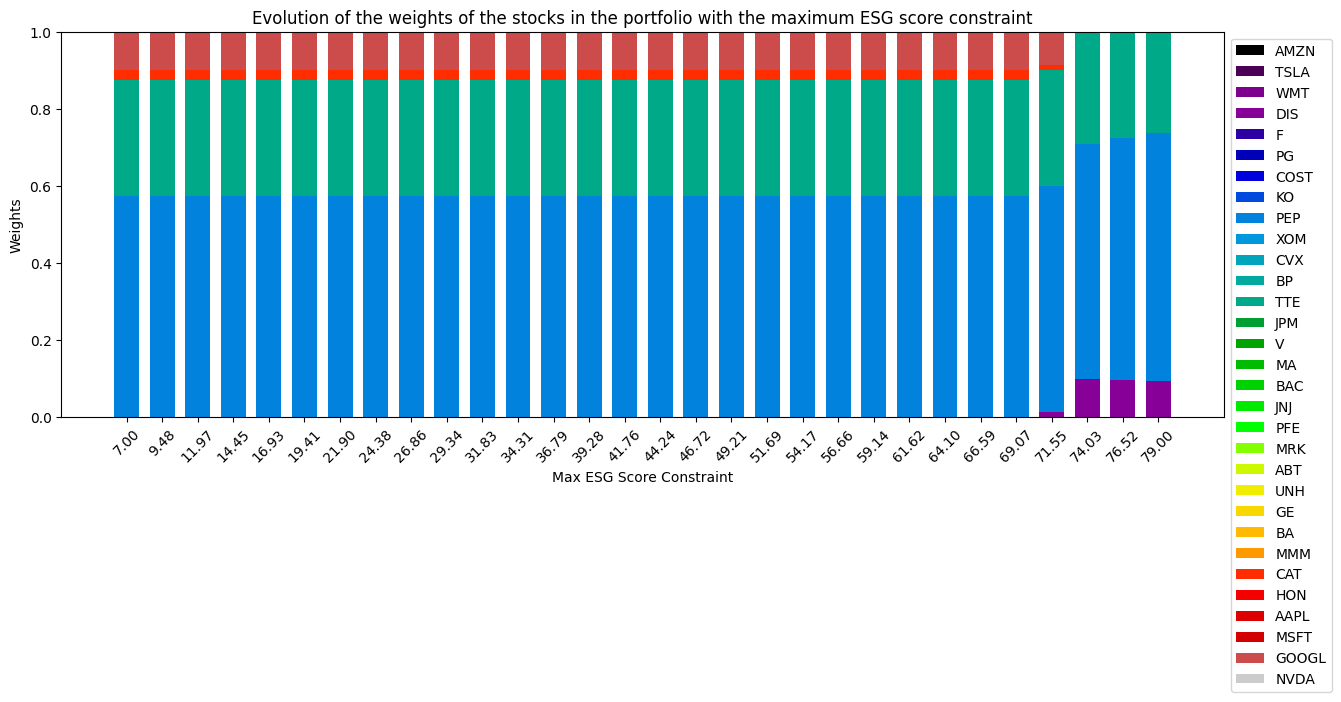

In [115]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=1,
                                 best_in_class_strategy='global',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


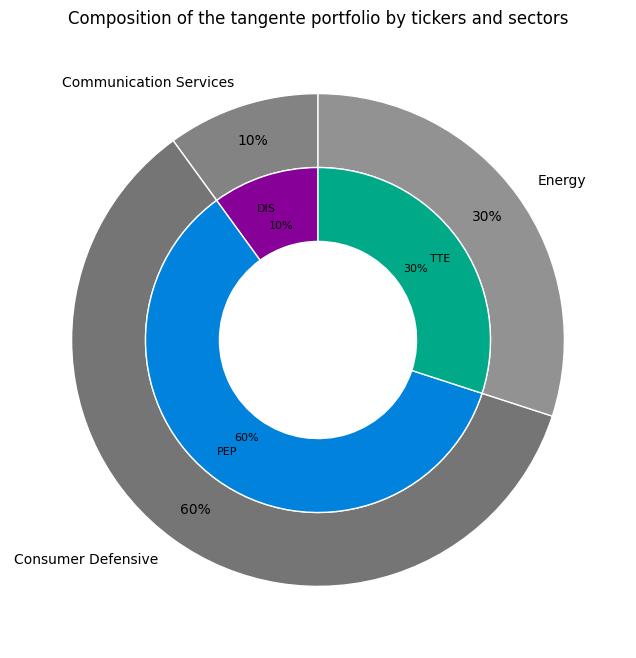

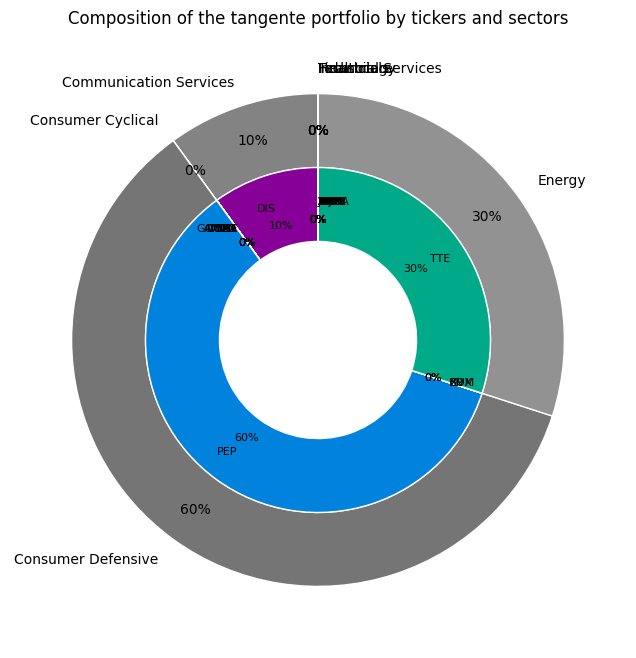

In [116]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=1,
                                            best_in_class_strategy='global',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

### 1.4.2. Lower bound - 50% sector

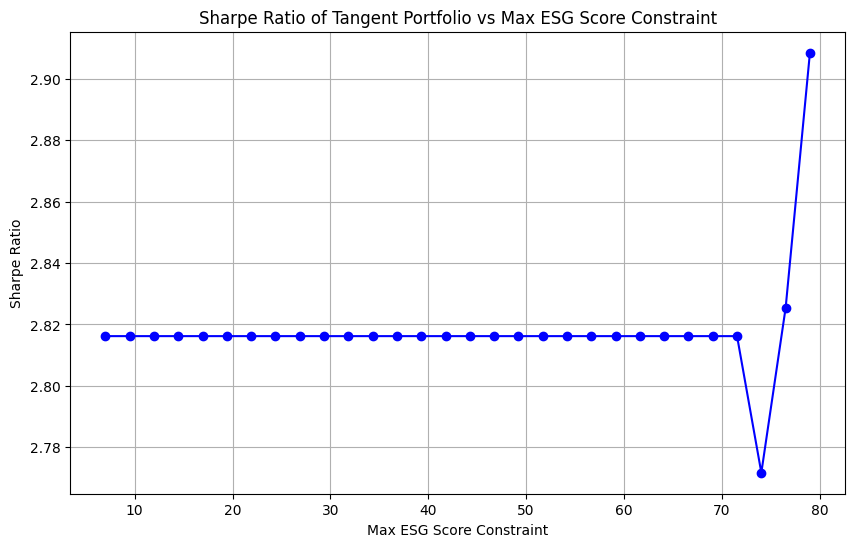

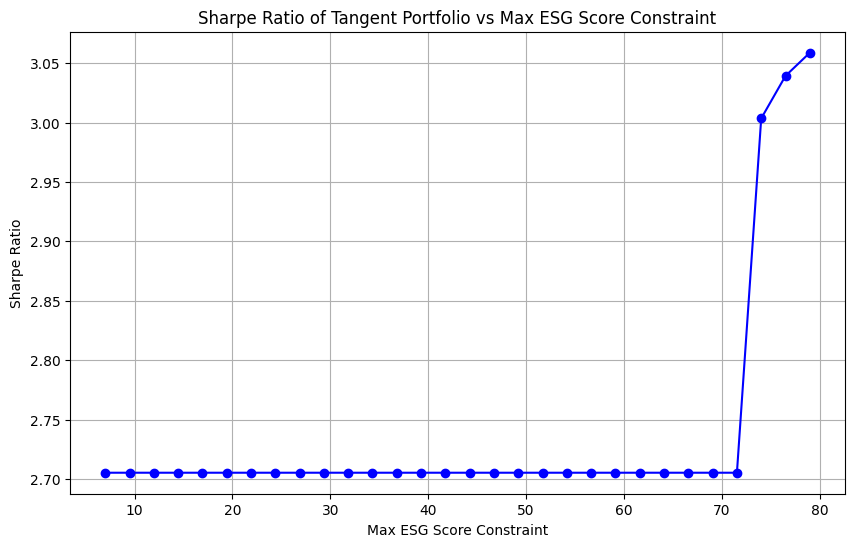

In [117]:
PORTFOLIO.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_sharp_ratio_vs_max_score(GAMMA_VALUES,
                                        risk_free_rate=RISK_FREE_RATE,
                                        max_esg_scores=MAX_ESG_SCORES,
                                        fully_invested=True,
                                        long_only=True,
                                        best_in_class_method=0.5,
                                        best_in_class_strategy='sector',
                                        sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)



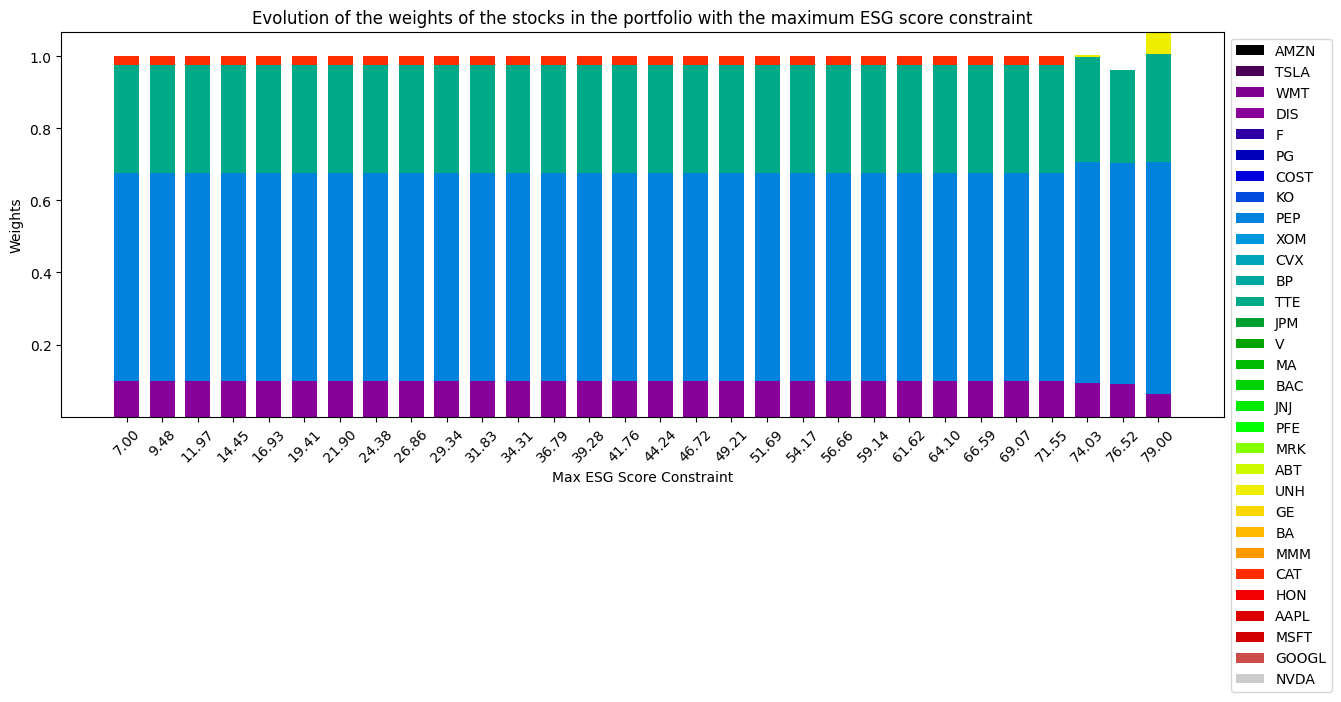

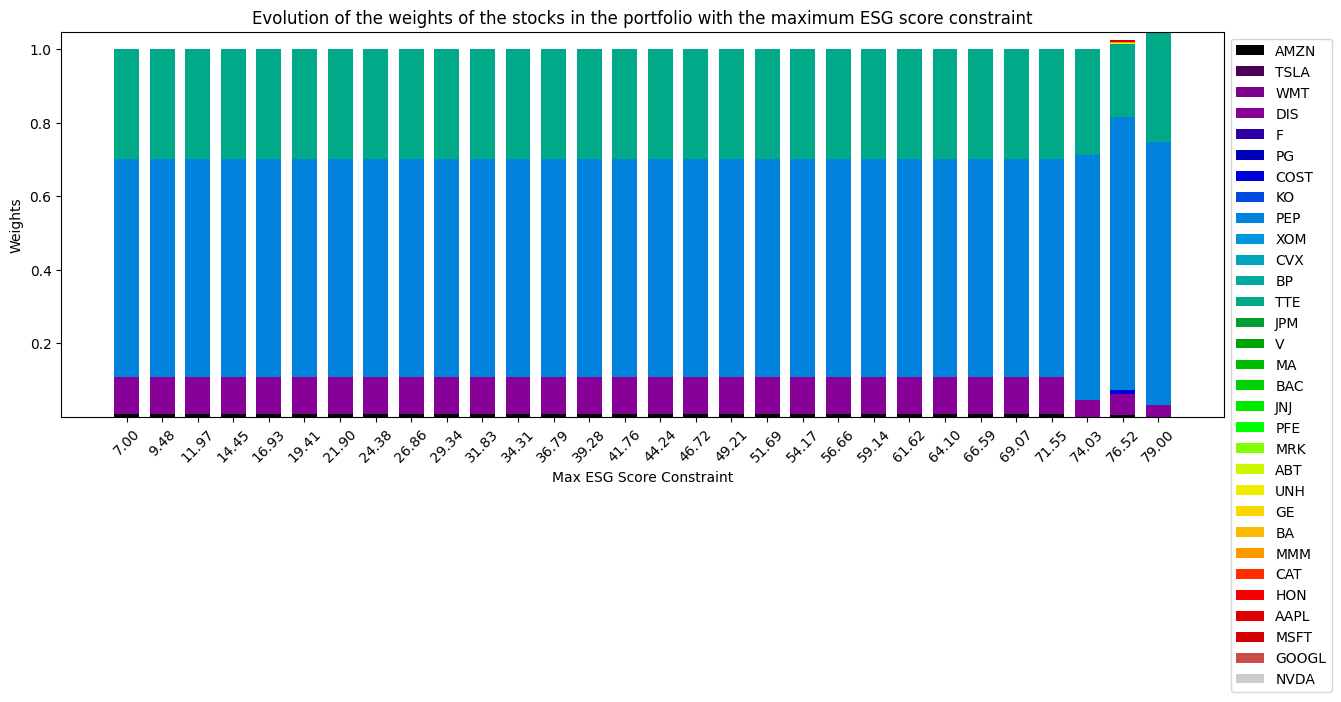

In [118]:
PORTFOLIO.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_weights_evolution(GAMMA_VALUES,
                                 risk_free_rate=RISK_FREE_RATE,
                                 max_esg_scores=MAX_ESG_SCORES,
                                 fully_invested=True,
                                 long_only=True, 
                                 best_in_class_method=0.5,
                                 best_in_class_strategy='sector',
                                 sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)


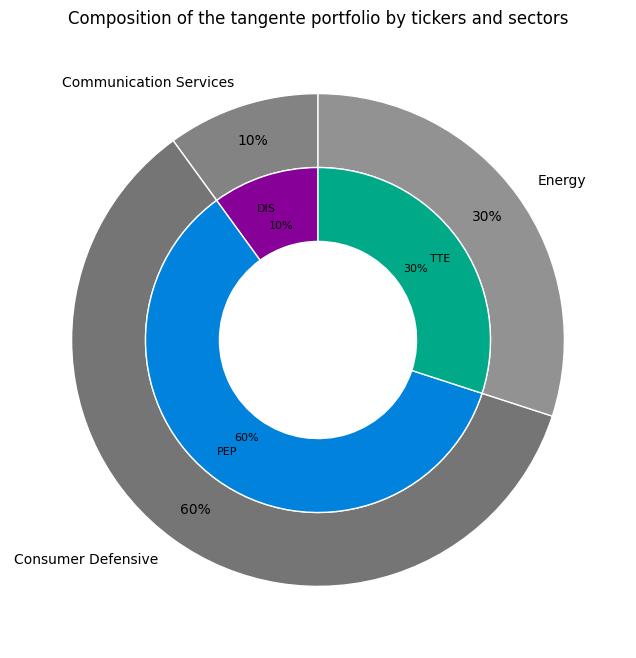

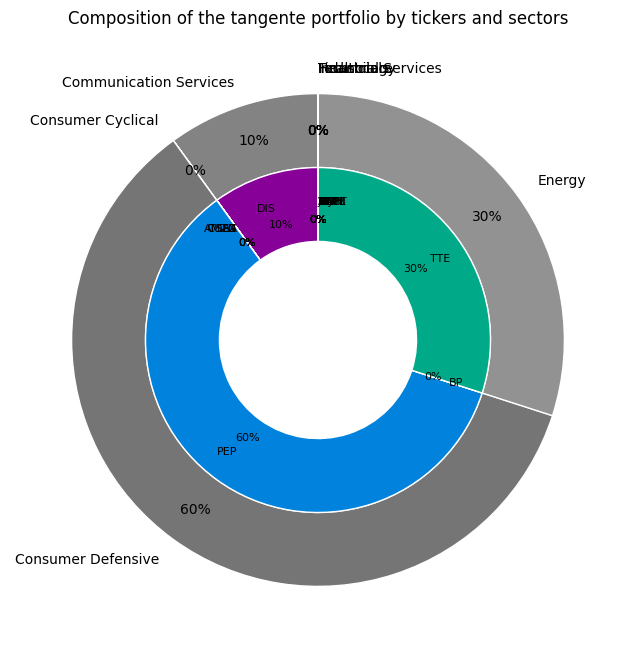

In [119]:
PORTFOLIO.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

PORTFOLIO_WITH_CONTROVERSE.plot_tangente_portfolio_composition(gammas=GAMMA_VALUES, 
                                            risk_free_rate=RISK_FREE_RATE,
                                            max_esg_score=73,
                                            fully_invested=True,
                                            long_only=True,
                                            best_in_class_method=0.5,
                                            best_in_class_strategy='sector',
                                            sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS)

# 2. Test portfolio performance on unseen data

In [120]:
def check_if_dates_are_correct(T0, T1, T2):
    if datetime.strptime(T1, '%Y-%m-%d') < get_first_date_with_all_msci_score_available(msci_score):
        print("ERROR: END_DATE is before the first date with all msci score available.")
        T1 = get_first_date_with_all_msci_score_available(msci_score)
        print(f"T1 is now {T1}, but you can change it.")
    else:
        print("Thanks for having entered a valid end date !")


def get_tangente_ptf_weights(T0, 
                             T1,
                             msci_score, 
                             TICKERS, 
                             INTERVAL, 
                             RISK_FREE_RATE, 
                             FREQUENCY_RETURNS, 
                             GAMMA_VALUES, 
                             min_esg_score,
                             fully_invested=True,
                             long_only=True,
                             best_in_class_method=1,
                             best_in_class_strategy='global',
                             sector_min_weight_x_dict=None):

    msci_last_esg_score = get_last_esg_scores(msci_score, T1)

    PTF = Portfolio(tickers=TICKERS,
                    start_date=T0,
                    end_date=T1,
                    interval=INTERVAL,
                    msci_data=msci_last_esg_score,
                    frequency_returns=FREQUENCY_RETURNS)
    
    PTF.download_data()

    PTF.get_optimal_portfolio_markowitz(gammas=GAMMA_VALUES, 
                                                  risk_free_rate=RISK_FREE_RATE,
                                                  max_esg_score=min_esg_score,
                                                  fully_invested=fully_invested,
                                                  long_only=long_only,
                                                  best_in_class_method=best_in_class_method,
                                                  best_in_class_strategy=best_in_class_strategy,
                                                  sector_min_weight_x_dict=sector_min_weight_x_dict)
    
    weights = PTF.weights_tangente_portfolio
    esg_score_tangent = PTF.score_esg_tangent
    

    return weights, esg_score_tangent

def test_tangente_ptf_weights(weights,
                              T1_bis,
                              T2,
                              msci_score,
                              TICKERS,
                              INTERVAL,
                              FREQUENCY_RETURNS):
    
    msci_last_esg_score = get_last_esg_scores(msci_score, T2)

    PTF = Portfolio(tickers=TICKERS,
                    start_date=T1_bis,
                    end_date=T2,
                    interval=INTERVAL,
                    msci_data=msci_last_esg_score,
                    frequency_returns=FREQUENCY_RETURNS)
    
    PTF.get_net_returns()

    return weights, PTF.net_returns, msci_last_esg_score


def get_tangent_ptf_evolution(T0, 
                              T1, 
                              T1_bis,
                              T2, 
                              msci_score, 
                              TICKERS, 
                              INTERVAL, 
                              RISK_FREE_RATE, 
                              FREQUENCY_RETURNS, 
                              GAMMA_VALUES, 
                              min_esg_score,
                              fully_invested=True,
                              long_only=True,
                              best_in_class_method=1,
                              best_in_class_strategy='global',
                              sector_min_weight_x_dict=None,
                              initial_value=None):
    
    weights, esg_score_tangent = get_tangente_ptf_weights(T0, 
                             T1,
                             msci_score, 
                             TICKERS, 
                             INTERVAL, 
                             RISK_FREE_RATE, 
                             FREQUENCY_RETURNS, 
                             GAMMA_VALUES, 
                             min_esg_score,
                             fully_invested,
                             long_only,
                             best_in_class_method,
                             best_in_class_strategy,
                             sector_min_weight_x_dict)
    
    weights, net_returns, msci_last_esg_score = test_tangente_ptf_weights(weights,
                                                                      T1_bis,
                                                                      T2,
                                                                      msci_score,
                                                                      TICKERS,
                                                                      INTERVAL,
                                                                      FREQUENCY_RETURNS)
                              


    # Calculate weighted returns
    weighted_returns = net_returns.dot(weights)

    # Calculate portfolio value
    portfolio_return = (1 + weighted_returns).prod()

    if initial_value is not None:
        portfolio_value = initial_value * portfolio_return
        print("Portfolio value:", portfolio_value)

    print("Portfolio return:", round(portfolio_return, 2))
    print("Portfolio esg score at T1:", esg_score_tangent)
    print("Portfolio esg score at T2:", np.array(msci_last_esg_score) @ weights)


In [121]:
T0='2020-01-01'
T1='2022-12-01'
T1_bis='2022-01-01'
T2='2023-12-01'

check_if_dates_are_correct(T0, T1, T2)

Thanks for having entered a valid end date !


In [ ]:
get_tangent_ptf_evolution(T0, 
                              T1, 
                              T1_bis,
                              T2, 
                              msci_score, 
                              TICKERS, 
                              INTERVAL, 
                              RISK_FREE_RATE, 
                              FREQUENCY_RETURNS, 
                              GAMMA_VALUES, 
                              min_esg_score=70,
                              fully_invested=True,
                              long_only=True,
                              best_in_class_method=1,
                              best_in_class_strategy='global',
                              sector_min_weight_x_dict=SECTOR_MIN_WEIGHT_X_DICT_SOME_MINS,
                              initial_value=100)

[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio value: 2765.403620838904
Portfolio return: 27.65
Portfolio esg score at T1: 71.21426193521177
Portfolio esg score at T2: 75.71426193521117


In [ ]:
for max_score in list(np.linspace(65, np.max(msci_last_esg_score), 15)):
    print(f"Max score: {max_score}")
    get_tangent_ptf_evolution(T0, 
                            T1, 
                            T1_bis,
                            T2, 
                            msci_score, 
                            TICKERS, 
                            INTERVAL, 
                            RISK_FREE_RATE, 
                            FREQUENCY_RETURNS, 
                            GAMMA_VALUES, 
                            min_esg_score=max_score,
                            fully_invested=True,
                            long_only=True,
                            best_in_class_method=1,
                            best_in_class_strategy='global',
                            sector_min_weight_x_dict=None)

Max score: 65.0
[*****                 10%%                      ]  3 of 31 completed

[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 124.02
Portfolio esg score at T1: 65.00000000000006
Portfolio esg score at T2: 61.50353391342911
Max score: 66.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 410.54
Portfolio esg score at T1: 66.0000000000001
Portfolio esg score at T2: 62.21520073887083
Max score: 67.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 1187.03
Portfolio esg score at T1: 67.00000000000004
Portfolio esg score at T2: 62.919425693471794
Max score: 68.0
[*********************100%%**********************]  31 of 31 completed
[*********************100%%**********************]  31 of 31 completed
Portfolio return: 65.55
Portfolio esg 

In [ ]:
# get weights of tangent portfolio under desired constraints
# test allocation return, vol, (sharp ratio) and esg score Y months later

In [ ]:
#TODO

#2. Backtest analyses
# train l'optimisation entre T0 et T1 -> renvoie des weights
# test les weights sur la période T1 et T2 -> renvoie un score de performance + analyse de si on respecte encore les contraintes esg en T2 (moyenne, variance etc.)
# faire cela pour les différents cas précédement identifiés (1 global, 0.5 global, 0.5 local ET ajout ou non de contraintes sectorielles)

#3. comparer à Sustainalytics ajrd (interval de confiance sur le score ESG?)

# Récap: vérifier les contraintes au cours du temps (les plots) et comparer à des indices ou des ptf equal weights.
# Répéter l'allocation chaque année et comparer comment la frontière efficiente évolue au cours du temps